In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

In [3]:
batch_size = 128
num_classes = 10
epochs = 5

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'sigmoid', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(2,2),activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [4]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))

In [32]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [33]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

In [24]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print("test loss: ", score[0])
print('test Accuracy: ', score[1])

Epoch 1/5
469/469 [==============================] - 94s 196ms/step - loss: 0.2219 - accuracy: 0.9327 - val_loss: 0.0542 - val_accuracy: 0.9828
Epoch 2/5
469/469 [==============================] - 93s 198ms/step - loss: 0.0641 - accuracy: 0.9798 - val_loss: 0.0449 - val_accuracy: 0.9857
Epoch 3/5
469/469 [==============================] - 104s 222ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0358 - val_accuracy: 0.9881
Epoch 4/5
469/469 [==============================] - 103s 219ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0397 - val_accuracy: 0.9878
Epoch 5/5
469/469 [==============================] - 101s 216ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0385 - val_accuracy: 0.9880
test loss:  0.038457877933979034
test Accuracy:  0.9879999756813049


In [5]:
model1.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

model1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model1.evaluate(x_test, y_test, verbose = 0)
print("test loss: ", score[0])
print('test Accuracy: ', score[1])

Epoch 1/5
469/469 [==============================] - 82s 172ms/step - loss: 0.4833 - accuracy: 0.9240 - val_loss: 0.0680 - val_accuracy: 0.9797
Epoch 2/5
469/469 [==============================] - 80s 171ms/step - loss: 0.0721 - accuracy: 0.9780 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 3/5
469/469 [==============================] - 85s 180ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 4/5
469/469 [==============================] - 86s 184ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0377 - val_accuracy: 0.9886
Epoch 5/5
469/469 [==============================] - 88s 187ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0532 - val_accuracy: 0.9860
test loss:  0.05316469073295593
test Accuracy:  0.9860000014305115


In [35]:
model2.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

model2.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model2.evaluate(x_test, y_test, verbose = 0)
print("test loss: ", score[0])
print('test Accuracy: ', score[1])

Epoch 1/5
469/469 [==============================] - 70s 147ms/step - loss: 0.4979 - accuracy: 0.9034 - val_loss: 0.0709 - val_accuracy: 0.9787
Epoch 2/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0908 - accuracy: 0.9732 - val_loss: 0.0535 - val_accuracy: 0.9835
Epoch 3/5
469/469 [==============================] - 67s 142ms/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 4/5
469/469 [==============================] - 79s 169ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0334 - val_accuracy: 0.9896
Epoch 5/5
469/469 [==============================] - 37s 78ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0419 - val_accuracy: 0.9871
test loss:  0.04186840355396271
test Accuracy:  0.9871000051498413


In [36]:
model3.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

model3.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model3.evaluate(x_test, y_test, verbose = 0)
print("test loss: ", score[0])
print('test Accuracy: ', score[1])

Epoch 1/5
469/469 [==============================] - 36s 76ms/step - loss: 0.4374 - accuracy: 0.9058 - val_loss: 0.0637 - val_accuracy: 0.9815
Epoch 2/5
469/469 [==============================] - 36s 76ms/step - loss: 0.0848 - accuracy: 0.9751 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 3/5
469/469 [==============================] - 35s 74ms/step - loss: 0.0609 - accuracy: 0.9819 - val_loss: 0.0400 - val_accuracy: 0.9874
Epoch 4/5
469/469 [==============================] - 39s 84ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 5/5
469/469 [==============================] - 39s 83ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0402 - val_accuracy: 0.9884
test loss:  0.04022940248250961
test Accuracy:  0.9883999824523926


In [6]:
# model.save('digit_recog1.model')
model1.save('digit_recog2.model')
# model2.save('digit_recog3.model')
# model3.save('digit_recog4.model')

INFO:tensorflow:Assets written to: digit_recog2.model\assets


INFO:tensorflow:Assets written to: digit_recog2.model\assets


In [7]:
# model = keras.models.load_model('digit_recog1.model')
model1 = keras.models.load_model('digit_recog2.model')
# model2 = keras.models.load_model('digit_recog3.model')
# model3 = keras.models.load_model('digit_recog4.model')

In [8]:
import os
import cv2 as cv
import matplotlib.pyplot as pt

1/1 [==============================] - 0s 356ms/step


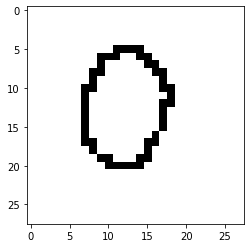

the number is prob a 9
1/1 [==============================] - 0s 46ms/step


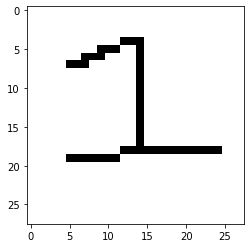

the number is prob a 2
1/1 [==============================] - 0s 32ms/step


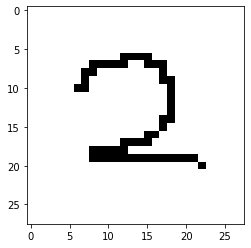

the number is prob a 2
1/1 [==============================] - 0s 41ms/step


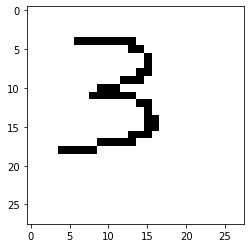

the number is prob a 2
1/1 [==============================] - 0s 41ms/step


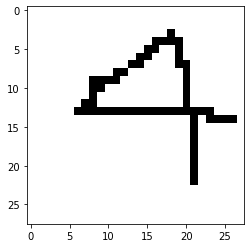

the number is prob a 2
1/1 [==============================] - 0s 44ms/step


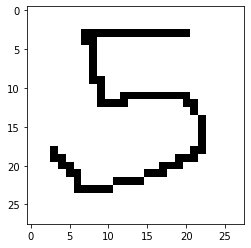

the number is prob a 5
1/1 [==============================] - 0s 67ms/step


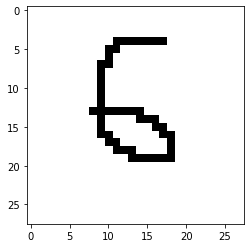

the number is prob a 5
1/1 [==============================] - 0s 45ms/step


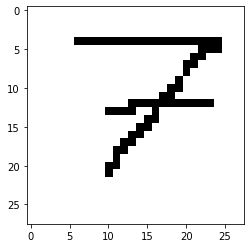

the number is prob a 7
1/1 [==============================] - 0s 76ms/step


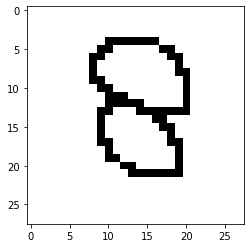

the number is prob a 8
1/1 [==============================] - 0s 37ms/step


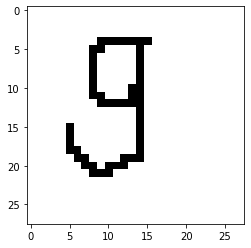

the number is prob a 1


In [9]:
image_num = 0
while os.path.isfile(f"digits/digit{image_num}.png"):
    try:
        img = cv.imread(f"digits/digit{image_num}.png")[:,:,0]
        img = np.invert(np.array([img]))
        # pred = model.predict(img)
        pred1 = model1.predict(img)
        # pred2 = model2.predict(img)
        # pred3 = model3.predict(img)
        pt.imshow(img[0], cmap = pt.cm.binary)
        pt.show()
        print(f"the number is prob a {np.argmax(pred1)}")
    except:
        print("error while opening file!")
    finally:
        image_num+=1
# img = cv.imread(f"digits/digit_9.png")[:,:,0]
# img = np.invert(np.array([img]))
# pred = model.predict(img)
# pt.imshow(img[0], cmap = pt.cm.binary)
# pt.show()
# print(pred)
